In [1]:
import pandas as pd
import numpy as np
import requests
from pandas.io.json import json_normalize #special package in pandas
import json
import matplotlib.pyplot as plt

In [2]:
# Getting APIs from website
stack_overflow_pandas='https://api.stackexchange.com/2.2/tags/pandas/info?order=desc&sort=popular&site=stackoverflow'
cross_validated_pandas='https://api.stackexchange.com/2.2/tags/pandas/info?order=desc&sort=popular&site=stats.stackexchange'
data_science_pandas='https://api.stackexchange.com/2.2/tags/pandas/info?order=desc&sort=popular&site=datascience.stackexchange'
stack_overflow_R='https://api.stackexchange.com/2.2/tags/R/info?order=desc&sort=popular&site=stackoverflow'
cross_validated_R='https://api.stackexchange.com/2.2/tags/R/info?order=desc&sort=popular&site=stats.stackexchange'
data_science_R='https://api.stackexchange.com/2.2/tags/R/info?order=desc&sort=popular&site=datascience.stackexchange'


In [3]:
# Getting url into JSON format
pandas_stack=requests.get(stack_overflow_pandas)
json_pandas_stack=pandas_stack.text

In [4]:
pandas_cross=requests.get(cross_validated_pandas)
json_pandas_cross=pandas_cross.text

In [5]:
pandas_datasci=requests.get(data_science_pandas)
json_pandas_datasci=pandas_datasci.text

In [6]:
# Creating datframe of pandas information
json_pandas_stack_str=json.loads(json_pandas_stack)
norm_pandas_stack=json_normalize(json_pandas_stack_str, record_path='items')
norm_pandas_stack

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,127689,pandas


In [7]:
json_pandas_cross_str=json.loads(json_pandas_cross)
norm_pandas_cross=json_normalize(json_pandas_cross_str,record_path='items')
norm_pandas_cross

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,101,pandas


In [8]:
json_pandas_datasci_str=json.loads(json_pandas_datasci)
norm_pandas_datasci=json_normalize(json_pandas_datasci_str,record_path='items')
norm_pandas_datasci

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,709,pandas


In [9]:
R_stack=requests.get(stack_overflow_R)
json_R_stack=R_stack.text

In [10]:
R_cross=requests.get(cross_validated_R)
json_R_cross=R_cross.text

In [11]:
R_datasci=requests.get(data_science_R)
json_R_datasci=R_datasci.text

In [12]:
json_R_stack_str=json.loads(json_R_stack)
norm_R_stack=json_normalize(json_R_stack_str, record_path='items')
norm_R_stack

,has_synonyms,is_moderator_only,is_required,count,name
0,True,False,False,317240,r


In [13]:
json_R_cross_str=json.loads(json_R_cross)
norm_R_cross=json_normalize(json_R_cross_str, record_path='items')
norm_R_cross

,has_synonyms,is_moderator_only,is_required,count,name
0,True,False,False,21065,r


In [14]:
json_R_datasci_str=json.loads(json_R_datasci)
norm_R_datasci=json_normalize(json_R_datasci_str, record_path='items')
norm_R_datasci

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,1082,r


In [15]:
# Concat dataframes in order to graph
stack_overflow_compare=pd.concat([norm_pandas_stack,norm_R_stack])
stack_overflow_compare

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,127689,pandas
0,True,False,False,317240,r


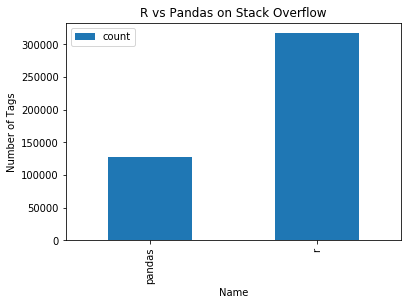

In [16]:
# Compare R vs. Pandas for Stack Overflow
stack_overflow_compare.plot(x='name',y='count',kind='bar')
plt.xlabel('Name')
plt.ylabel('Number of Tags')
plt.title('R vs Pandas on Stack Overflow')
plt.show()

In [17]:
cross_validated_compare=pd.concat([norm_pandas_cross,norm_R_cross])
cross_validated_compare

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,101,pandas
0,True,False,False,21065,r


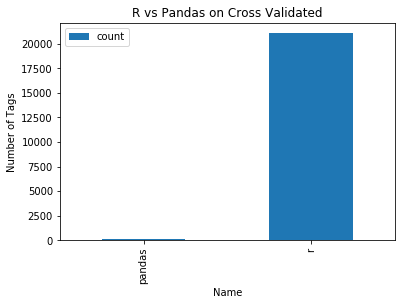

In [18]:
cross_validated_compare.plot(x='name',y='count',kind='bar')
plt.xlabel('Name')
plt.ylabel('Number of Tags')
plt.title('R vs Pandas on Cross Validated')
plt.show()

In [19]:
data_science_compare=pd.concat([norm_pandas_datasci,norm_R_datasci])
data_science_compare

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,709,pandas
0,False,False,False,1082,r


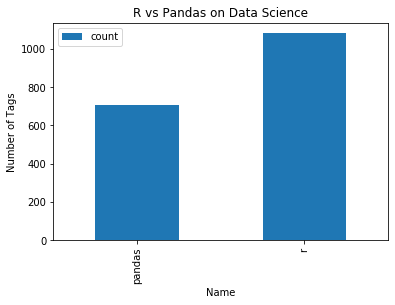

In [20]:
data_science_compare.plot(x='name',y='count',kind='bar')
plt.xlabel('Name')
plt.ylabel('Number of Tags')
plt.title('R vs Pandas on Data Science')
plt.show()

In [21]:
# Concat all the dataframes with pandas as a tool
pandas_list=[norm_pandas_stack,norm_pandas_cross,norm_pandas_datasci]
pandas_df=pd.concat(pandas_list)
pandas_df

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,127689,pandas
0,False,False,False,101,pandas
0,False,False,False,709,pandas


In [22]:
R_list=[norm_R_stack,norm_R_cross,norm_R_datasci]
R_df=pd.concat(R_list)
R_df

,has_synonyms,is_moderator_only,is_required,count,name
0,True,False,False,317240,r
0,True,False,False,21065,r
0,False,False,False,1082,r


In [23]:
# Combine the two dataframes together for a combined dataframe with both tools
community_total=pd.concat([pandas_df,R_df])
community_total

,has_synonyms,is_moderator_only,is_required,count,name
0,False,False,False,127689,pandas
0,False,False,False,101,pandas
0,False,False,False,709,pandas
0,True,False,False,317240,r
0,True,False,False,21065,r
0,False,False,False,1082,r


In [24]:
# Count total number of tagged questions across all three communities for both data science tools
# and put into a dataframe
combined_stats=[[community_total.query('name =="%s"' % 'pandas')['count'].sum(),'pandas'],
              [community_total.query('name =="%s"' % 'r')['count'].sum(),'R']]

combined_stats_df=pd.DataFrame(combined_stats,columns=['total_tagged','name'])
combined_stats_df

,total_tagged,name
0,128499,pandas
1,339387,R


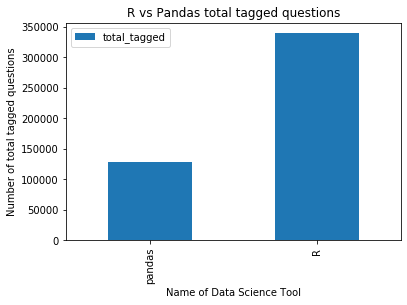

In [25]:
# Graph dataframe to see the overall comparison
combined_stats_df.plot(x='name',y='total_tagged',kind='bar')
plt.xlabel('Name of Data Science Tool')
plt.ylabel('Number of total tagged questions')
plt.title('R vs Pandas total tagged questions')
plt.show()

In [26]:
# Results
#________
# We can see that R is consistantly more popular than pandas as a data science tool based on the number of questions asked.
# Based on the total number of tagged questions, we can see R questions being asked approximately 3x as much as pandas questions.
# Within each community, R is still in the lead by around 3x for the general community Stack Overflow and almost 21x 
# for the statistics oriented Cross Validated. For the Data Science community website, Pandas has 2/3rds the number 
# of questions of R. This is perhaps the most balanced of the three communities as we are comparing R's data science tools 
# with Python's data science tool Pandas. 
#________
# Takeaway message
#_________________
# R is the more popular data science tool as the number of questions asked greatly exceeds that of pandas. However these
# graphs do not tell the whole story.
# Limitations
#____________
# This comparison is a apples to oranges comparison. We are comparing R the programming language to Pandas
# the Python software library for data science. Of course R is going to have a huge amount of hits compared to pandas across
# all three websites simply because users have the choice to ask questions about any aspect of R versus a very specific library 
# of Python. It is actually impressive questions about pandas are asked with anywhere close to the frequency of that of the
# entire language of R. This shows pandas is a very popular tool for data science when using Python.
# It would be better to compare pandas with the equivalent library in R for example Dplyr or Shiny. 
# Citation
# Everything comes from https://api.stackexchange.com